WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    't' is an internal variable of group 'poissongroup', but also exists in the run namespace with the value 4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'poissongroup', but also exists in the run namespace with the value 4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    't' is an internal variable of group 'synapses', but also exists in the run namespace with the value 4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


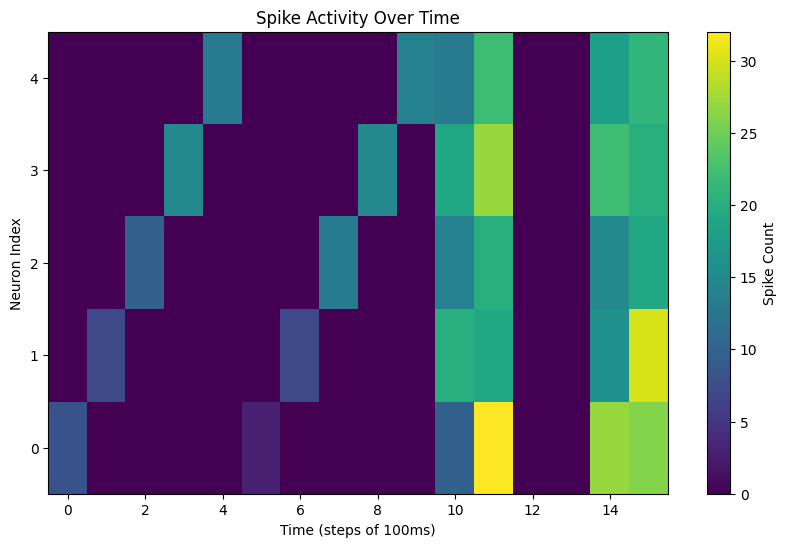

In [1]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_neurons = 5          # Number of Poisson neurons
stimulus_time = 100*ms # Time interval for each stimulus
epoch_length = stimulus_time * n_neurons  # Total time for each epoch

first_stimulus_sequence = np.zeros((n_neurons, n_neurons))
for i in range(n_neurons):
    first_stimulus_sequence[i, i] = 100  # 100 Hz for one neuron, 0 Hz for others

second_stimulus_sequence = np.zeros((n_neurons, n_neurons))
for t in range(n_neurons):
    if t % 2 == 0:
        second_stimulus_sequence[t, :] = 200 # 50 Hz for even neurons

test_stimulus_time = 200*ms  # Time interval for the second stimulus

firing_rates = TimedArray(first_stimulus_sequence * Hz, dt=stimulus_time)
# Define the Poisson group
poisson_neurons = PoissonGroup(n_neurons, rates="firing_rates(t%epoch_length, i)")

receivers = NeuronGroup(n_neurons, 'v:1', threshold='v>1', reset='v=0', method='exact')
receivers.v = 0
receivers_synapses = Synapses(poisson_neurons, receivers, model="""dw/dt= w/3*hertz: 1 (event-driven)
                              """, on_pre='v_post += w', delay=1*ms)
receivers_synapses.connect()
receivers_synapses.w = 0.5
# Monitor spikes
spike_monitor = SpikeMonitor(poisson_neurons)

# Run the simulation
run(epoch_length*2)

firing_rates = TimedArray(second_stimulus_sequence * Hz, dt=test_stimulus_time)
stimulus_time = test_stimulus_time
run(test_stimulus_time*3)

# Analyze results
spike_times = spike_monitor.t/ms
spike_indices = spike_monitor.i
total_time = epoch_length*2 + test_stimulus_time*3
# Create a 2D grid to visualize results
grid = np.zeros((n_neurons, int(total_time/ms/100)))

for neuron, time in zip(spike_indices, spike_times):
    grid[neuron, int(time // 100)] += 1  # Increment the corresponding grid cell

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(grid, aspect='auto', interpolation='nearest', origin='lower')
plt.colorbar(label="Spike Count")
plt.xlabel("Time (steps of 100ms)")
plt.ylabel("Neuron Index")
plt.title("Spike Activity Over Time")
plt.show()

In [3]:
print(len(spike_monitor.spike_trains()))

5


In [3]:
print(receivers_synapses.equations)

In [31]:
import pickle

data = (spike_monitor.spike_trains()[0])
with open('spike_trains.pkl', 'wb') as f:
    pickle.dump(data, f)



In [ ]:
import pickle
def get_all_relevant_data( synapses, monitor):
    weights_and_delays = {}
    weights_and_delays["i"] = np.array(synapses.i)
    print(f"type i: {type(synapses.i)}")
    weights_and_delays["j"] = np.array(synapses.j)
    print(f"type j: {type(synapses.j)}")
    weights_and_delays["w"] = np.array(synapses.w)
    print(f"type w: {type(synapses.w)}")
    weights_and_delays["delay"] = np.array(synapses.delay)
    print(f"type delay: {type(synapses.delay)}")
    spikes = {}
    spikes["0"] = dict(monitor.spike_trains())
    print(f"type spikes: {type(monitor.spike_trains())}")
    return {"weights_and_delays": weights_and_delays, "spikes": spikes}

all_data = get_all_relevant_data(
    synapses=receivers_synapses,
    monitor=spike_monitor
)

with open("spike_trains_new.pkl", "wb") as file:
    pickle.dump(all_data, file)

with open("spike_trains_new.pkl", "rb") as file:
    unpickled_data = pickle.load(file)

    print(unpickled_data)


WARNING    /Users/jreid/Dropbox/dphil/programming/spikes/spikes/network/neurons.py:163: UserWarning: Mismatch in conductance parameters for type 'e'. Required: tau_ee, tau_ie, tau_a; Forbidden: tau_ei, tau_ii. Check values: tau_ee=2. ms, tau_ie=5. ms, tau_a=80. ms, tau_ei=None, tau_ii=None
  warnings.warn(
 [py.warnings]
WARNING    /Users/jreid/Dropbox/dphil/programming/spikes/spikes/network/neurons.py:151: UserWarning: Missing required parameters: v_reversal_a
  warnings.warn(f"Missing required parameters: {', '.join(missing_params)}")
 [py.warnings]
WARNING    /Users/jreid/Dropbox/dphil/programming/spikes/spikes/network/neurons.py:163: UserWarning: Mismatch in conductance parameters for type 'i'. Required: tau_ei, tau_ii; Forbidden: tau_ee, tau_ie, tau_a. Check values: tau_ei=2. ms, tau_ii=5. ms, tau_ee=None, tau_ie=None, tau_a=None
  warnings.warn(
 [py.warnings]


Parameter lambda_e is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter lambda_a is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter alpha_C is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter alpha_D is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter tau_c is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter tau_d is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter alpha_C is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile synapses
Parameter alpha_D is not provided. If l is a lateral synapse, it may not be needed if we are dealing with eli or ile syn

Convolving images: 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]


creating 4 neuron layers
creating layer 1
adding layer1 neurons to network
adding layer1 neurons to network
creating layer 2
adding layer2 neurons to network
adding layer2 neurons to network
creating layer 3
adding layer3 neurons to network
adding layer3 neurons to network
creating layer 4
adding layer4 neurons to network
adding layer4 neurons to network
creating 4 synapse layers
creating synapses for layer 1
 *** creating efe synapses for layer 1 ***
synapse_name: efe_1
 *** connecting efe synapses for layer 1 ***
 *** RETRIEVING DATA FOR efe_1 ***


WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


Setting synapse parameters
 *** creating ele synapses for layer 1 *** 
synapse_name: ele_1
 *** RETRIEVING DATA FOR ele_1 ***
Setting synapse parameters
 *** creating eli synapses for layer 1 *** 
synapse_name: eli_1
 *** RETRIEVING DATA FOR eli_1 ***
Setting synapse parameters
 *** creating ile synapses for layer 1 *** 
synapse_name: ile_1
 *** RETRIEVING DATA FOR ile_1 ***
Setting synapse parameters
creating synapses for layer 2
 *** creating efe synapses for layer 2 ***
synapse_name: efe_2
 *** connecting efe synapses for layer 2 ***
 *** RETRIEVING DATA FOR efe_2 ***
Setting synapse parameters
 *** creating ele synapses for layer 2 *** 
synapse_name: ele_2
 *** RETRIEVING DATA FOR ele_2 ***
Setting synapse parameters
 *** creating ebe synapses for layer 2
synapse_name: ebe_2
 *** RETRIEVING DATA FOR ebe_2 ***
no connections for neuron 3262
no connections for neuron 4095
Setting synapse parameters
 *** creating eli synapses for layer 2 *** 
synapse_name: eli_2
 *** RETRIEVING DATA F

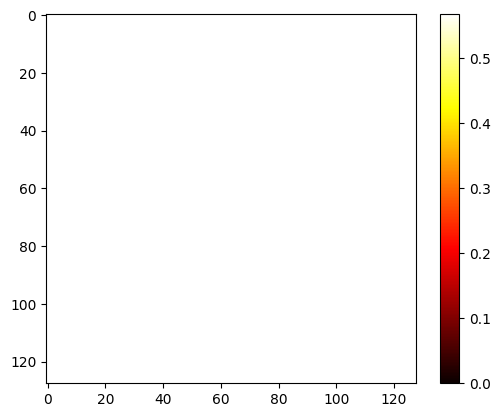

########## WIRING INPUT LAYER ##########
num_neurons: 4096
beta:6000
[[ 3.42097644  3.42097644 13.03014424 ... 11.47797395  6.79757236
   6.79757236]
 [ 5.45488266  5.45488266  9.39063459 ...  9.49826663  4.85723573
   4.85723573]
 [18.70248939 18.70248939 14.41011463 ... 18.18076731 15.29517811
  15.29517811]
 ...
 [18.06289159 18.06289159 14.04585755 ... 17.87713255 14.55593652
  14.55593652]
 [17.17626952 17.17626952  2.74656764 ... 14.20043406 12.23666791
  12.23666791]
 [28.40308938 28.40308938  1.00695973 ...  4.94283687  0.6583227
   0.6583227 ]] Hz
beta:6000
[[ 3.42097644  3.42097644 13.03014424 ... 11.47797395  6.79757236
   6.79757236]
 [ 5.45488266  5.45488266  9.39063459 ...  9.49826663  4.85723573
   4.85723573]
 [18.70248939 18.70248939 14.41011463 ... 18.18076731 15.29517811
  15.29517811]
 ...
 [18.06289159 18.06289159 14.04585755 ... 17.87713255 14.55593652
  14.55593652]
 [17.17626952 17.17626952  2.74656764 ... 14.20043406 12.23666791
  12.23666791]
 [28.40308938 28.

INFO       No numerical integration method specified for group 'e_1', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'e_2', using method 'euler' (took 0.00s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'e_3', using method 'euler' (took 0.00s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'e_4', using method 'euler' (took 0.00s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'i_1', using method 'euler' (took 0.01s, trying other methods took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'i_2', using method 'euler' (took 0.0

running epoch no 2
current time 0.8 s
running testing epoch
plasticity set to 0 for efe_3
plasticity set to 0 for ebe_2
plasticity set to 0 for ele_3
plasticity set to 0 for ele_1
plasticity set to 0 for ele_4
plasticity set to 0 for efe_1
plasticity set to 0 for ele_2
plasticity set to 0 for ebe_3
plasticity set to 0 for efe_2
plasticity set to 0 for ebe_4
current time 1.6 s
Test Complete
current time 3.6 s
analysing data
4096
1
1797
1797
1798
1796
1797
1798
1799
1799
1798
1798
1799
1797
1796
1798
1798
1798
1798
1796
1798
1798
1798
1798
1799
1798
1798
1798
1798
1798
1796
1798
1797
1798
1797
1797
1798
1797
1798
1798
1797
1796
1795
1798
1798
1797
1798
1796
1797
1796
1796
1797
1798
1798
1797
1798
1798
1798
1796
1797
1798
1798
1799
1799
1799
1798
1798
1799
1799
1797
1797
1799
1798
1799
1799
1799
1798
1798
1799
1797
1799
1796
1798
1798
1797
1798
1799
1799
1798
1798
1798
1798
1798
1798
1798
1797
1798
1799
1798
1798
1799
1798
1799
1799
1798
1797
1797
1798
1799
1799
1799
1797
1797
1799
1799
1

In [ ]:
############# IMPORTS ###############
from brian2 import *
from network import *
from input import *
from run import *
from analysis import *
from tensorflow.keras.datasets import mnist
from PIL import Image
import orjson
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import os
import pickle
from datetime import datetime


##########GET INPUTS ############
def gen_brian_inputs():
    """
    Generates 3D Poisson input rates using Gabor filters for a set of images.
    This function performs the following steps:
    1. Defines parameters for Gabor filters including wavelengths, scaling factors, orientations, phase offsets, and aspect ratios.
    2. Creates Gabor filters using the specified parameters.
    3. Generates permutations of image identifiers.
    4. Loads and processes images from the specified path.
    5. Converts images to greyscale and normalizes them.
    6. Generates 3D Poisson input rates from the processed images using the Gabor filters.
    Returns:
        np.ndarray: A 3D array of Poisson input rates generated from the images.
    """

    import numpy as np

    lambdas = [0.8]  # Wavelengths
    betas = [1]  # Scaling factor for bandwidth
    thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Orientations
    psis = [0, np.pi]  # Phase offsets
    gammas = [0.5]  # Aspect ratio
    size = 6  # Gabor filter sizes
    gabor_filters = GaborFilters(size, lambdas, betas, thetas, psis, gammas)

    from itertools import product

    permutations = list(product(["c", "v"], repeat=3))
    image_path = "data/3N2P/"
    # Create an np array with 8 images and each size 124x124:
    images = np.zeros((8, 128, 128))
    image_no = 0
    print("analysing data")
    for t, l, r in permutations:
        print(f"t: {t}, l: {l}, r: {r}")
        image_paths = image_path + f"t{t}_l{l}_r{r}.jpg"
        print(image_paths)
        image = Image.open(image_paths)
        greyscale = image.convert("L")
        greyscale = np.array(greyscale) / 255.0
        images[image_no] = greyscale
        image_no += 1

    _3d_poisson_inputs = generate_3d_poisson_rates_from_filters(
        images,
        gabor_filters,
        neuron_size=64,
        image_size=128,
    )
    # This has the shape num_images, neuron_size, neuron_size, num_filters

    return _3d_poisson_inputs


if __name__ == "__main__":

    ########## MAIN LOGIC ############
    # Create equations and network
    equations_container = EquationsContainer()
    network = Network()

    # Define Constants
    # import file from weights/initial_setup.json as DATA
    with open("weights/initial_setup.json", "rb") as file:
        DATA = orjson.loads(file.read())

    N_LAYERS = 4  # Number of layers to create
    NO_EPOCHS = 2
    STIMULUS_LENGTH = 100 * ms
    NUM_INPUTS = 8
    STORAGE = None  # It worked but should be falsy so be concerned - I think I check whether it's None not False
    DESCRIBE_NETWORK = False
    input_lambda_e = 30 * nS
    TEST_STIMULUS_LENGTH = 250 * ms
    RESTORE = (False,)
    STORE = (False,)
    RADII = {
        "efe": {1: 8, 2: 12, 3: 16},
        "ele": {1: 2, 2: 2, 3: 2, 4: 2},
        "ebe": {2: 8, 3: 8, 4: 8},
        "eli": {1: 2, 2: 2, 3: 2, 4: 2},
        "ile": {1: 4, 2: 4, 3: 4, 4: 4},
    }
    AVG_NO_CONNECTIONS = {
        "efe": {0: 50, 1: 100, 2: 100, 3: 100},
        "ele": {1: 10, 2: 10, 3: 10, 4: 10},
        "ebe": {1: 10, 2: 10, 3: 10, 4: 10},
        "eli": {1: 10, 2: 10, 3: 10, 4: 10},
        "ile": {1: 30, 2: 30, 3: 30, 4: 30},
    }

    # Define neuron specifications:
    exc_neuron_specs = NeuronSpecs(
        neuron_type="e",
        length=64,
        cm=500 * pF,
        g_leak=25 * nS,
        v_threshold=-53 * mV,
        v_reset=-57 * mV,
        v_rest=-74 * mV,
        v_reversal_e=0 * mV,
        v_reversal_i=-70 * mV,
        v_reversal_a=-90 * mV,
        sigma=0.015 * mV,
        t_refract=2 * ms,  # NEED TO ADD THIS
        tau_m=20 * ms,
        tau_ee=2 * ms,
        tau_ie=5 * ms,
        tau_a=80 * ms,
    )

    inh_neuron_specs = NeuronSpecs(
        neuron_type="i",
        length=32,
        cm=214 * pF,
        g_leak=18 * nS,
        v_threshold=-53 * mV,
        v_reset=-58 * mV,
        v_rest=-82 * mV,
        v_reversal_e=0 * mV,
        v_reversal_i=-70 * mV,
        sigma=0.015 * mV,
        t_refract=2 * ms,
        tau_m=12 * ms,
        tau_ei=2 * ms,
        tau_ii=5 * ms,
    )

    # Define synapse specifications:
    # Define synapse specifications:
    efe_synapse_specs = SynapseSpecs(
        model=equations_container.synaptic_equations["stdp_model"],
        on_pre=equations_container.synaptic_equations["stdp_on_pre"],
        on_post=equations_container.synaptic_equations["stdp_on_post"],
        type="f",
        lambda_e=30 * nS,
        lambda_a=6 * nS,
        alpha_C=0.5,
        alpha_D=0.5,
        tau_c=5 * ms,
        tau_d=5 * ms,
        learning_rate=0.02,  # NO IT ?aint
    )

    ele_synapse_specs = SynapseSpecs(
        model=equations_container.synaptic_equations["stdp_model"],
        on_pre=equations_container.synaptic_equations["stdp_on_pre"],
        on_post=equations_container.synaptic_equations["stdp_on_post"],
        type="l",
        lambda_e=20 * nS,
        lambda_a=6 * nS,
        alpha_C=0.5,
        alpha_D=0.5,
        tau_c=5 * ms,
        tau_d=5 * ms,
        learning_rate=0.02,
    )
    ebe_synapse_specs = SynapseSpecs(
        model=equations_container.synaptic_equations["stdp_model"],
        on_pre=equations_container.synaptic_equations["stdp_on_pre"],
        on_post=equations_container.synaptic_equations["stdp_on_post"],
        type="b",
        lambda_e=20 * nS,
        lambda_a=6 * nS,
        alpha_C=0.5,
        alpha_D=0.5,
        tau_c=5 * ms,
        tau_d=5 * ms,
        learning_rate=0.02,
    )

    eli_synapse_specs = SynapseSpecs(
        model=equations_container.synaptic_equations["inhib_non_stdp_model"],
        on_pre=equations_container.synaptic_equations["inhib_non_stdp_on_pre"],
        type="l",
        lambda_i=30 * nS,
    )
    ile_synapse_specs = SynapseSpecs(
        model=equations_container.synaptic_equations["excit_non_stdp_model"],
        on_pre=equations_container.synaptic_equations["excit_non_stdp_on_pre"],
        type="l",
        lambda_e=20 * nS,
        lambda_a=6 * nS,
    )

    _3d_poisson_rates = (
        gen_brian_inputs()
    )  # This has the shape num_images, neuron_size, neuron_size, num_filters
    absolute_3d_poisson_rates = np.abs(_3d_poisson_rates)
    # Create Neuron Groups:
    create_neuron_groups(network, N_LAYERS, exc_neuron_specs, inh_neuron_specs)

    # Create Synapses:
    create_synapse_groups(
        network,
        N_LAYERS,
        RADII,
        AVG_NO_CONNECTIONS,
        exc_neuron_specs,
        inh_neuron_specs,
        efe_synapse_specs,
        ele_synapse_specs,
        ebe_synapse_specs,
        eli_synapse_specs,
        ile_synapse_specs,
        storage=STORAGE,
        data=DATA,
        store=STORE,
        restore=RESTORE,
    )
    ####################    Sort inputs   ####################
    print("Generating inputs")

    # Got to make sure this is defined globally - can it be added to the network/included globally?
    epoch_length = STIMULUS_LENGTH * NUM_INPUTS

    visualise_poisson_inputs(absolute_3d_poisson_rates)

    train_input, test_input, poisson_neurons = wire_input_layer_brian(
        network,
        exc_neuron_specs,
        absolute_3d_poisson_rates,
        beta=6000,
        radius=2,
        avg_no_neurons=AVG_NO_CONNECTIONS["efe"][0],
        epoch_length=epoch_length,
        stimulus_exposure_time=STIMULUS_LENGTH,
        stimulus_exposure_time_test=TEST_STIMULUS_LENGTH,
        input_lambda_e=input_lambda_e,
        storage=STORAGE,
        data=DATA,
        store=STORE,
    )

    namespace = {
        "input_lambda_e": input_lambda_e,
        "timed_input": train_input,
        "epoch_length": epoch_length,
    }
    # spike_counter = NeuronGroup(N=64 * 64, model="dv/dt=0*Hz:1")
    # network.add(spike_counter)
    # synapses_to_counter = Synapses(
    #     poisson_neurons, spike_counter, model="w:1", on_pre="v+=w"
    # )
    # i_indices = DATA["i_0"]
    # j_indices = DATA["j_0"]
    # synapses_to_counter.connect(i=i_indices, j=j_indices)
    # synapses_to_counter.w = 1
    # network.add(synapses_to_counter)
    # counter_monitor = StateMonitor(
    #     source=spike_counter, dt=STIMULUS_LENGTH, record=True, variables="v"
    # )
    # network.add(counter_monitor)

    # if STORAGE:
    #     print(f"storing the following in storage {list(STORAGE.keys())}")
    #     store_synapses(
    #         STORAGE,
    #         N_LAYERS,
    #         exc_neuron_specs,
    #         inh_neuron_specs,
    #         "weights",
    #         "initial_setup.json",
    #     )

    print(running_network)

    ####################    MONITOR NETWORK   ####################
    network_monitors = Monitors(network, N_LAYERS)
    # network_monitors.setup_poisson_monitors("spike")
    network_monitors.setup_excitatory_monitors([1, 2, 3, 4], "spike")
    network_monitors.toggle_monitoring([1], "spike", enable=False)

    ####################    TRAIN NETWORK   ####################
    defaultclock.dt = 0.1 * ms
    run_training(network, namespace, STIMULUS_LENGTH, NUM_INPUTS, no_epochs=NO_EPOCHS)
    # recorded_times = counter_monitor.t
    # cumulative_activity = counter_monitor.v
    # period_activity = np.zeros((64 * 64, len(recorded_times)))
    # for i in range(64 * 64):
    #     for j in range(len(recorded_times)):
    #         period_activity[i, j] = (
    #             cumulative_activity[i, j] - cumulative_activity[i, j - 1]
    #             if j > 0
    #             else cumulative_activity[i, j]
    #         )
    # print(cumulative_activity[:, 7])
    # num_images = 8

    # # Iterate over each image and create a heatmap
    # for i in range(num_images + 1):
    #     plt.figure(figsize=(6, 6))
    #     plt.title(f"Neuron Activity Heatmap for Image {i+1}")

    #     # Reshape period_activity for the current image into a 64x64 grid
    #     activity_grid = period_activity[:, i].reshape(64, 64)

    #     # Create the heatmap
    #     plt.imshow(activity_grid, cmap="hot", interpolation="nearest")
    #     plt.colorbar(label="Activity Level")
    #     plt.xlabel("Neuron Index (X)")
    #     plt.ylabel("Neuron Index (Y)")
    #     # Save the heatmap to a file
    #     output_dir = "results/misc_data/no_spikes_per_image"
    #     os.makedirs(output_dir, exist_ok=True)
    #     output_path = os.path.join(output_dir, f"img_{i+1}.png")
    #     plt.savefig(output_path)
    #     plt.show()
    ####################    TEST NETWORK   ####################
    namespace["timed_input"] = test_input
    namespace["epoch_length"] = TEST_STIMULUS_LENGTH * NUM_INPUTS
    timed_input = test_input
    epoch_length = TEST_STIMULUS_LENGTH * NUM_INPUTS
    # binned_spikes = network_monitors.bin_poisson_spikes(NUM_INPUTS, STIMULUS_LENGTH)

    # for i in range(NUM_INPUTS):
    #     plt.figure()
    #     spike_counts = binned_spikes[i, :]
    #     bins = [0, 1, 2, 3, 4, 5]
    #     hist, bin_edges = np.histogram(spike_counts, bins=bins + [np.inf])

    #     plt.bar(bins, hist, align="center", tick_label=["0", "1", "2", "3", "4", "5+"])
    #     for j in range(len(hist)):
    #         plt.text(bins[j], hist[j], str(hist[j]), ha="center", va="bottom")

    #     plt.xlabel("Number of spikes")
    #     plt.ylabel("Number of neurons")
    #     plt.title(f"Histogram of spikes for image {i}")
    #     plt.ylim(0, max(hist) * 1.1)
    #     plt.show()

    spike_monitor_0 = SpikeMonitor(poisson_neurons, record=True)
    spike_monitor_1 = SpikeMonitor(exc_neuron_specs.neuron_groups[1], record=True)
    spike_monitor_2 = SpikeMonitor(exc_neuron_specs.neuron_groups[2], record=True)
    spike_monitor_3 = SpikeMonitor(exc_neuron_specs.neuron_groups[3], record=True)
    spike_monitor_4 = SpikeMonitor(exc_neuron_specs.neuron_groups[4], record=True)
    monitors = {
        0: spike_monitor_0,
        1: spike_monitor_1,
        2: spike_monitor_2,
        3: spike_monitor_3,
        4: spike_monitor_4,
    }
    print("running testing epoch")
    run_testing_epoch(
        network_monitors, network, namespace, TEST_STIMULUS_LENGTH, NUM_INPUTS
    )
    print("analysing data")

    data = network_monitors.the_full_monty(
        directory="results", filename="spike_data_26th_november_2024"
    )

    def get_all_relevant_data(
        Network,
        monitors,
        efe_synapse_specs,
        ele_synapse_specs,
        ebe_synapse_specs,
        eli_synapse_specs,
        ile_synapse_specs,
    ):
        """
        Get all relevant data from the network and store it in a dictionary.
        Returns:
            dict: A dictionary containing all relevant data from the network.
            weights (dict): A dictionary containing the weights of all synapses.
            spikes (dict): A dictionary containing the spike times of all excitatory neurons contained within the monitors object.
        """
        weights_and_delays = {}
        synapses = {
            "efe": efe_synapse_specs,
            "ele": ele_synapse_specs,
            "ebe": ebe_synapse_specs,
            "eli": eli_synapse_specs,
            "ile": ile_synapse_specs,
        }
        for synapse_type_str, synapse_type_object in synapses.items():
            dictionary = {}
            synapse_groups = synapse_type_object.synapse_objects
            layer = 0
            for key, item in synapse_groups.items():
                dictionary[layer] = {
                    "i": np.array(item[0].i),
                    "j": np.array(item[0].j),
                    "w": np.array(item[0].w),
                    "delay": np.array(item[0].delay),
                }
                layer += 1
            weights_and_delays[synapse_type_str] = dictionary
        print(type(weights_and_delays))
        print(weights_and_delays)
        spikes = {}
        for key, item in monitors.items():
            spikes[key] = dict(item.spike_trains())
        print(type(spikes))
        print(spikes)
        return {"weights_and_delays": weights_and_delays, "spikes": spikes}

    # synapses = [efe_synapse_specs, ele_synapse_specs, ebe_synapse_specs, eli_synapse_specs, ile_synapse_specs]
    # weights_and_delays = {}
    # for synapse_type in synapses:
    #         dictionary = {}
    #         synapse_groups = synapse_type.synapse_objects
    #         dictionary["key"] = {
    #             "i": np.array(synapse_groups[0].i),
    #             "j": np.array(synapse_groups[0].j),
    #             "w": np.array(synapse_groups[0].w),
    #             "delay": np.array(synapse_groups[0].delay),
    #         }
    #         weights_and_delays[synapse_type] = dictionary
    # spikes = {}
    # for key, item in monitors.items():
    #     spikes[key] = dict(item.spike_trains())
    # print(type(spikes))

    data_in_network = get_all_relevant_data(
        network,
        monitors,
        efe_synapse_specs,
        ele_synapse_specs,
        ebe_synapse_specs,
        eli_synapse_specs,
        ile_synapse_specs,
    )
    print(type(data_in_network))
    os.makedirs("results/full_monty", exist_ok=True)
    with open("results/full_monty/dataset.pkl", "wb") as file:
        pickle.dump(data_in_network, file)


In [15]:
def get_all_relevant_data(
        Network,
        monitors,
        efe_synapse_specs,
        ele_synapse_specs,
        ebe_synapse_specs,
        eli_synapse_specs,
        ile_synapse_specs,
    ):
        """
        Get all relevant data from the network and store it in a dictionary.
        Returns:
            dict: A dictionary containing all relevant data from the network.
            weights (dict): A dictionary containing the weights of all synapses.
            spikes (dict): A dictionary containing the spike times of all excitatory neurons contained within the monitors object.
        """
        weights_and_delays = {}
        synapses = {
            "efe": efe_synapse_specs,
            "ele": ele_synapse_specs,
            "ebe": ebe_synapse_specs,
            "eli": eli_synapse_specs,
            "ile": ile_synapse_specs,
        }
        for synapse_type_str, synapse_type_object in synapses.items():
            dictionary = {}
            synapse_groups = synapse_type_object.synapse_objects
            layer = 0
            for key, item in synapse_groups.items():
                dictionary[layer] = {
                    "i": np.array(item[0].i),
                    "j": np.array(item[0].j),
                    "w": np.array(item[0].w),
                    "delay": np.array(item[0].delay),
                }
                layer += 1
            weights_and_delays[synapse_type_str] = dictionary
        print(type(weights_and_delays))
        print(weights_and_delays)
        spikes = {}
        for key, item in monitors.items():
            spikes[key] = dict(item.spike_trains())
        print(type(spikes))
        print(spikes)
        return {"weights_and_delays": weights_and_delays, "spikes": spikes}

data_in_network = get_all_relevant_data(
        network,
        monitors,
        efe_synapse_specs,
        ele_synapse_specs,
        ebe_synapse_specs,
        eli_synapse_specs,
        ile_synapse_specs,
    )

<class 'dict'>
{'efe': {0: {'i': array([   0,    4,    6, ..., 4028, 4029, 4030], dtype=int32), 'j': array([   0,    0,    0, ..., 4095, 4095, 4095], dtype=int32), 'w': array([0.50729245, 0.34126723, 0.29530558, ..., 0.11361999, 0.45628075,
       0.55171427]), 'delay': array([0.00744774, 0.00494388, 0.00689426, ..., 0.00722231, 0.00263856,
       0.00366478])}, 1: {'i': array([   0,    2,    3, ..., 4027, 4028, 4030], dtype=int32), 'j': array([   0,    0,    0, ..., 4095, 4095, 4095], dtype=int32), 'w': array([0.66477312, 0.90670668, 0.12873108, ..., 0.94090801, 0.82196447,
       0.81293351]), 'delay': array([0.00409356, 0.00979528, 0.00353826, ..., 0.0025801 , 0.00868798,
       0.00180625])}, 2: {'i': array([   9,   10,   14, ..., 3966, 4018, 4022], dtype=int32), 'j': array([   0,    0,    0, ..., 4095, 4095, 4095], dtype=int32), 'w': array([0.97499567, 0.66455768, 0.52192615, ..., 0.3720704 , 0.41316797,
       0.63951514]), 'delay': array([0.0074473 , 0.00584   , 0.00891128, ...,

In [1]:
data_in_network["spikes"]

NameError: name 'data_in_network' is not defined

In [1]:
from brian2 import *
from tqdm import tqdm

# Define a custom callback for tqdm
class BrianProgressBar:
    def __init__(self, duration):
        self.duration = duration
        self.pbar = tqdm(total=duration/ms, desc="Simulation Progress")

    def __call__(self, elapsed_time, complete_time=None, start_time=None, completed=False, **kwargs):
        # Update the progress bar
        self.pbar.update((elapsed_time - self.pbar.n * ms) / ms)

        # Close the progress bar when completed
        if completed:
            self.close()

    def close(self):
        self.pbar.close()

# Set up simulation
start_scope()
G2= NeuronGroup(1000, 'dv/dt = -v / (10*ms) : 1', threshold='v>1', reset='v=0')
G1 = PoissonGroup(1000, rates=100*Hz)
S = Synapses(G1, G2, on_pre='v_post += 0.1')
S.connect(condition='i!=j', p=0.01)
G2.v = 'rand()'

# Run with progress bar
duration = 10*second
progress = BrianProgressBar(duration)

run(duration, report=progress)

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
Simulation Progress:   0%|          | 0/10000.0 [00:00<?, ?it/s]INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]
Simulation Progress:   0%|          | 0.0/10000.0 [00:04<?, ?it/s]
